<a href="https://colab.research.google.com/github/NeslihanBabaarslan/PANDAS/blob/main/DL_Assignment_2_(Image_Classification_with_CNN)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [7]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [9]:
X_train[5].shape

(28, 28)

In [10]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

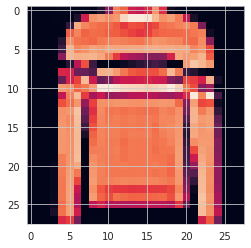

In [11]:
plt.imshow(X_train[5])

In [12]:
y_train[5]

2

In [13]:
y_train.shape

(60000,)

In [14]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [15]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [16]:
y_train[0]

9

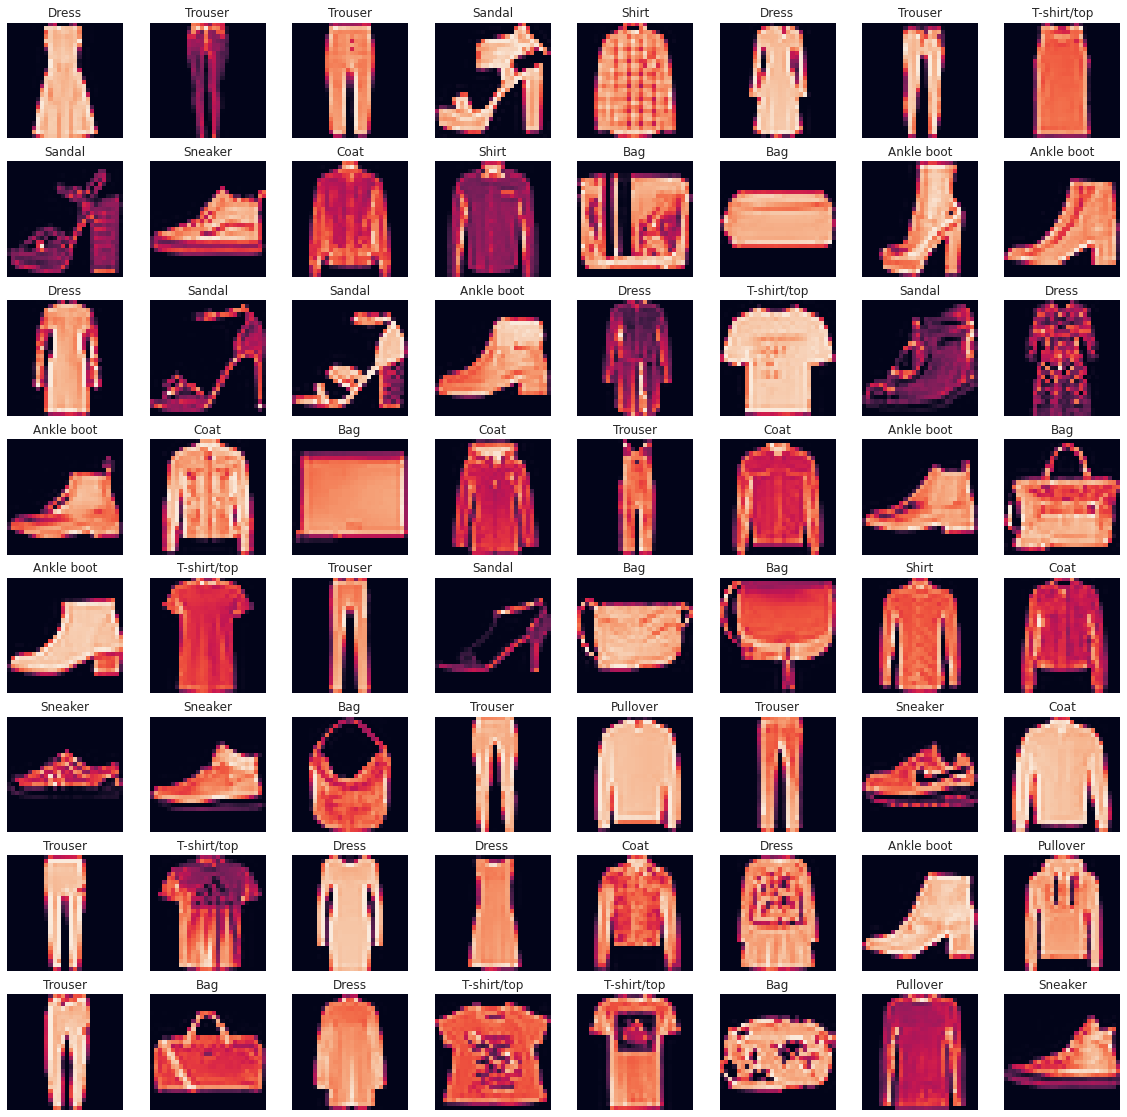

In [18]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [19]:
X_train[5].min()

0

In [20]:
X_train[5].max()

255

In [21]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [22]:
X_train[5].min()

0.0

In [23]:
X_train[5].max()

1.0

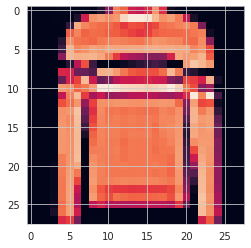

In [24]:
plt.imshow(X_train[5])

In [25]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [26]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [27]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [28]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [29]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [30]:
from tensorflow.keras.utils import to_categorical

In [31]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [32]:
y_train[9]

5

In [33]:
Y_train[9]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [36]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 

model.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size, padding = valid

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [41]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])



Epoch 1/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.3830 - accuracy: 0.8637 - val_loss: 0.3077 - val_accuracy: 0.8884
Epoch 2/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2609 - accuracy: 0.9065 - val_loss: 0.2904 - val_accuracy: 0.8924
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2164 - accuracy: 0.9202 - val_loss: 0.2526 - val_accuracy: 0.9091
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1850 - accuracy: 0.9325 - val_loss: 0.2472 - val_accuracy: 0.9133
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1571 - accuracy: 0.9417 - val_loss: 0.2431 - val_accuracy: 0.9159
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1325 - accuracy: 0.9502 - val_loss: 0.2586 - val_accuracy: 0.9149
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1104 - accuracy: 0.9595 - val_loss: 0.2664 -

In [42]:
model.metrics_names

['loss', 'accuracy']

In [43]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.383,0.864,0.308,0.888
1,0.261,0.906,0.290,0.892
2,0.216,0.920,0.253,0.909
3,0.185,0.932,0.247,0.913
4,0.157,0.942,0.243,0.916


**TASK 7: Plot values of metrics you used in your model.**

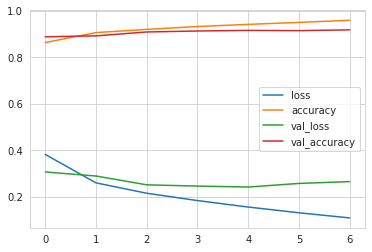

In [44]:
summary.plot();

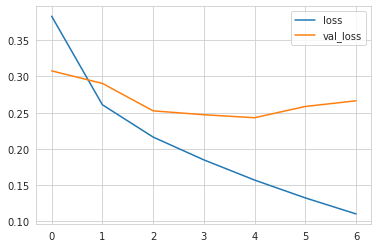

In [45]:
summary[["loss", "val_loss"]].plot();

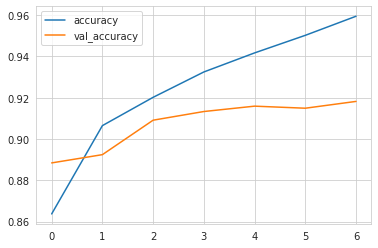

In [46]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [47]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [48]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2431 - accuracy: 0.9159


[0.24306875467300415, 0.9158999919891357]

In [49]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.24306875467300415
Test accuracy: 0.9158999919891357


In [50]:
pred_prob = model.predict(X_test)
pred_prob

array([[1.0149625e-06, 1.1357661e-09, 8.1012949e-08, ..., 1.5776068e-03,
        6.0629998e-07, 9.9828702e-01],
       [1.1964499e-04, 3.9479181e-15, 9.9985540e-01, ..., 5.5341238e-09,
        3.0504169e-12, 1.6882487e-11],
       [2.8114599e-07, 9.9999976e-01, 4.7176845e-09, ..., 7.0145821e-13,
        1.0378089e-10, 1.7880872e-14],
       ...,
       [5.6933679e-08, 2.9989882e-11, 1.9505246e-07, ..., 7.0525857e-08,
        9.9998343e-01, 4.0307069e-09],
       [6.0663484e-07, 9.9998212e-01, 7.8963716e-08, ..., 5.5875367e-11,
        1.9167780e-11, 1.1346775e-10],
       [3.2959777e-04, 4.4055678e-06, 3.2305652e-03, ..., 1.7276783e-01,
        5.2225194e-03, 6.2929709e-03]], dtype=float32)

In [51]:
pred_prob.shape

(10000, 10)

In [52]:
pred_prob[0]

array([1.0149625e-06, 1.1357661e-09, 8.1012949e-08, 4.4181270e-08,
       2.4898487e-08, 1.3307808e-04, 5.6140146e-07, 1.5776068e-03,
       6.0629998e-07, 9.9828702e-01], dtype=float32)

In [53]:
np.argmax(pred_prob[0])

9

In [54]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [55]:
y_pred.shape

(10000,)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.86      0.87      1000
           3       0.88      0.94      0.91      1000
           4       0.88      0.87      0.87      1000
           5       0.99      0.97      0.98      1000
           6       0.77      0.76      0.76      1000
           7       0.94      0.98      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [57]:
print(confusion_matrix(y_test, y_pred))

[[864   0  16  28   3   0  84   0   5   0]
 [  0 979   0  13   4   0   3   0   1   0]
 [ 16   0 860  14  47   0  63   0   0   0]
 [  8   2   8 942  13   0  26   0   1   0]
 [  1   1  48  34 868   0  48   0   0   0]
 [  0   0   0   0   0 968   0  20   0  12]
 [ 91   0  52  37  55   0 759   0   6   0]
 [  0   0   0   0   0   2   0 980   1  17]
 [  0   2   3   8   1   1   2   3 979   1]
 [  0   0   0   0   0   3   1  36   0 960]]


In [58]:
y_test != y_pred

array([False, False, False, ..., False, False, False])

In [59]:
(y_test != y_pred).sum()

841

## Prediction

In [60]:
my_number = X_test[3]

In [61]:
my_number.shape

(28, 28, 1)

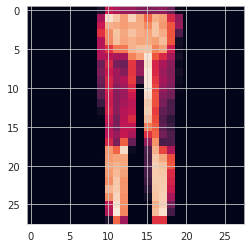

In [62]:
plt.imshow(my_number.reshape(28,28));

In [63]:
pred_prob = model.predict(my_number.reshape(1,28,28,1))
pred_prob

array([[1.5521088e-06, 9.9999559e-01, 4.9397064e-09, 2.6078592e-06,
        1.0998109e-07, 2.5715324e-10, 8.3011741e-08, 6.0286268e-12,
        3.5116628e-11, 1.6155828e-11]], dtype=float32)

In [64]:

y_pred = np.argmax(pred_prob)
y_pred

1

In [65]:

model.save("clothe.h5")

In [66]:
model=tf.keras.models.load_model('clothe.h5')

In [67]:
pred=model.predict(np.expand_dims(X_test[5],axis=0))

In [68]:
np.argmax(pred)

1

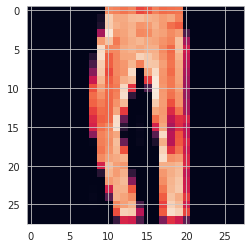

In [69]:
plt.imshow(X_test[5].reshape(28,28))

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___